In [2]:
# -*- coding: utf-8 -*-

# Processes Halo Data from Halo Catalogs

import sys, os
import numpy as np
from matplotlib import pyplot as plt
from halotools import sim_manager
import h5py
from scipy import fftpack
from scipy.fftpack import fftfreq, fftshift, ifftshift, ifftn
#from emcee.utils import MPIPool

Lbox = 512.0 # size of box in Mpc/h
Ngrid = 256.0 # number of cells in 1D of grid for power spectrum

bin_centers = np.arange(Ngrid) # integer linear space up to number of cells for as bin centers
Lgrid = Lbox / Ngrid # the size of each individual grid cell

# directories, sub directories, and out list files for subhalo and parent halo catelogs
subhalo_main_dir = "~/temp/"
subhalo_cosmo_tup = ("mnv0.00000_om0.30000_As2.1000/", "mnv0.10000_om0.30000_As2.1000/", "mnv0.60000_om0.30000_As2.1000/")
subhalo_out_tup = ("out_37.list", "out_42.list", "out_47.list", "out_56.list", "out_66.list")

parent_main_dir = "/tigress/ayannam/"
parent_cosmo_tup = ("mnv_0.0", "mnv_0.1", "mnv_0.6")
subhalo_out_tup = ("out_37_parents.list", "out_42_parents.list", "out_47_parents.list", "out_56_parents.list", "out_66_parents.list")

headers_str = "#ID DescID Mvir Vmax Vrms Rvir Rs Np X Y Z VX VY VZ JX JY JZ Spin rs_klypin Mvir_all M200b M200c M500c M2500c Xoff Voff spin_bullock b_to_a c_to_a A[x] A[y] A[z] b_to_a(500c) c_to_a(500c) A[x](500c) A[y](500c) A[z](500c) T/|U| M_pe_Behroozi M_pe_Diemer Halfmass_Radius PID"
headers_tup = tuple(headers_str.split(" "))

columns_dict ={
		"halo_id": 	(0, 'i8'),
		"halo_mvir": 	(2, 'f4'),
        "halo_vmax":    (3, 'f4'),
		"halo_rvir":    (5, 'f4'),
        "halo_rs":      (6, 'f4'),
		"halo_x": 	(8, 'f4'),
		"halo_y": 	(9, 'f4'),
		"halo_z": 	(10,'f4'),
        "halo_spin":(17, 'f4'),
		"PID":		(41,'i8')
	       }

#def read_cat(cat_filename):
   # returns a matrix with each halo as the row and x, y, z positions as the columns, array of the log10 of the halo masses, and the PID array
   # must use 3D accessing to access postions and 2D accessing to access the masses where the second dimension is the halo
   #reader = sim_manager.TabularAsciiReader(cat_filename, columns_dict)
   #halo_arr = reader.read_ascii() # array of tuples containing values for each item in columns_dict
   #halo_pos_arr = np.array([halo_arr["halo_x"], halo_arr["halo_y"], halo_arr["halo_z"]]).T #array of arrays containing the x, y, z positions of the halo
   #halo_mass_arr = np.log10(halo_arr["halo_mvir"]) # array of log base 10 of the halo masses
   
   #halo_PID_arr = np.array(halo_arr["PID"])
   #return halo_pos_arr, halo_mass_arr, halo_PID_arr


def plot_halo_mass(mass_filename, PID_filename):
    
    mass_arr = np.load(mass_filename)
    PID_arr = np.load(PID_filename)
   
    parents_mask = PID_arr == -1 # boolean array with True for parent halos and False for subhalos
    subhalo_mask = PID_arr != -1 # boolean array with True for subhalos and False for parent halos
    
    plt.hist(mass_arr, bins = 50, label = "All Halos", histtype = "step") # plots mass function of all of the halos
    plt.hist(mass_arr[parents_mask], bins = 50, label = "Parent-Halos", histtype = "step") # plots the mass function of the parent halos
    plt.hist(mass_arr[subhalo_mask], bins = 50, label = "Sub-Halos", histtype = "step") # plots the mass function of the subhalos

    plt.title("(6/20/18) Halo Mass Function MNV = 0.1, z = 1")
    plt.xlabel("Log10 (Halo Mass)")
    plt.ylabel("Number of Halos")
    plt.legend()
    plt.show()

    plt.hist(mass_arr, bins = 50, label = "All Halos", histtype = "step") # plots mass function of all of the halos
    plt.hist(mass_arr[parents_mask], bins = 50, label = "Parent-Halos", histtype = "step") # plots the mass function of the parent halos
    plt.hist(mass_arr[subhalo_mask], bins = 50, label = "Sub-Halos", histtype = "step") # plots the mass function of the subhalos
   
    plt.title("(6/20/18) Log Halo Mass Function MNV = 0.1, z = 1")
    plt.xlabel("Log10 (Halo Mass)")
    plt.ylabel("Log10 (Number of Halos)")
    plt.yscale('log')
    plt.legend()
    plt.show()
    
plot_halo_mass("/u/ayannam/Documents/Raw_Data/mnv_0.1/out_47_parents_mass.npy", "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_47_parents_PID.npy")

/u/ayannam/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

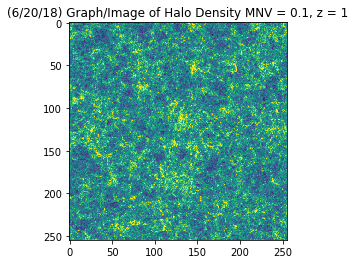

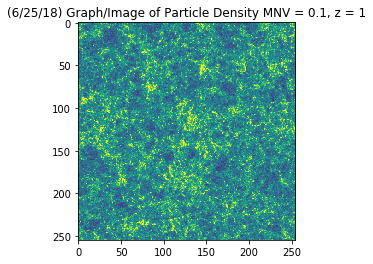

In [6]:
def plot_grid(grid_filename):
    g = np.load(grid_filename)
    plt.imshow(np.sum(g, axis = 0), vmin = -3 * np.std(np.sum(g, axis = 0)), vmax = 3 * np.std(np.sum(g, axis = 0)))
    
plot_grid("/u/ayannam/Documents/Grids/mnv_0.1/out_47_parents_grid.npy")
plt.title("(6/20/18) Graph/Image of Halo Density MNV = 0.1, z = 1")
plt.show()

plot_grid("/u/ayannam/Documents/Grids/snapshot_mnv_0.1/snapshot_047.npy")
plt.title("(6/25/18) Graph/Image of Particle Density MNV = 0.1, z = 1")
plt.show()

In [37]:
def azimuthalAverage3D(grid, edges = None, logbins = True, bins = 50):
    z, y, x = np.indices(grid.shape)
    icenter=(x.max()-x.min())/2.0
    center = np.array([icenter, icenter, icenter])
     
    if grid.shape[0]%2 == 0:
        center+=0.5
     
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2)#distance to center pixel, for each pixel
 
    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind] # the index to sort by r
    i_sorted = grid.flat[ind] # the index of the images sorted by r
 
    # find index that's corresponding to the lower edge of each bin
    kmin=1.0
    kmax=grid.shape[0]/2.0
    if edges == None:
        if logbins:
            edges = np.logspace(np.log10(kmin),np.log10(kmax),bins+1)
        else:
            #edges = linspace(kmin,kmax+0.001,bins+1)    
            edges = np.linspace(kmin,kmax,bins+1)
    if edges[0] > 0:
        edges = np.append([0],edges)
         
    hist_ind = np.histogram(r_sorted,bins = edges)[0] # hist_ind: the number in each ell bins, sum them up is the index of lower edge of each bin, first bin spans from 0 to left of first bin edge.    
    hist_sum = np.cumsum(hist_ind)
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[hist_sum[1:]] - csim[hist_sum[:-1]]
    radial_prof = tbin / hist_ind[1:]
    return edges[1:], radial_prof

edge2center = lambda x: x[:-1]+0.5*(x[1:]-x[:-1])

def PowerSpectrum3D(grid, logbins = True, bins=50):
    # Calculate the power spectrum for a cube.
    # Input:
    # grid = input grid in numpy array.
    # Output:
    # k, psd1D
    isize = grid.shape[0]
    F = fftshift(fftpack.fftn(grid))
    psd3D = np.abs(F)**2
    k_arr, psd1D = azimuthalAverage3D(psd3D, logbins = logbins, bins=bins)
    k_arr = edge2center(k_arr)
    return k_arr, psd1D
 
def process_ps(grid_filename):
    '''
    Comoput the power spectrum giving the positions of particles/halos.
    Input:
    The positions, output from either read_cat, or read_subsample
    Output: 
    k_normed: the k bin center
    ps3d_normed: the power spectrum
    '''
    igrid = np.load(grid_filename)
    k, ps3d = PowerSpectrum3D(igrid)
    k_normed, ps3d_normed = 2*np.pi*k/Lbox, ps3d*(Lgrid/Ngrid)**3
    return k_normed, ps3d_normed

def plot_power_spectrum(grid_filename, label):
    
    k, p = process_ps(grid_filename)
    
    #plt.plot(k, p)
    #plt.title("(6/25/18) Halo Power Spectrum MNV = 0.1, z = 1")
    #plt.xlabel("k (1/r)")
    #plt.ylabel("Power Density (log10(mass))")
    #plt.show()
    
    plt.plot(k, p, label = label)
    #plt.title("(6/25/18) log-log Halo Power Spectrum MNV = 0.1, z = 1")
    plt.xlabel("log(k) (log(1/r))")
    plt.ylabel("Power Density (log10(mass))")
    plt.xscale('log')
    plt.yscale('log')
    

/u/ayannam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


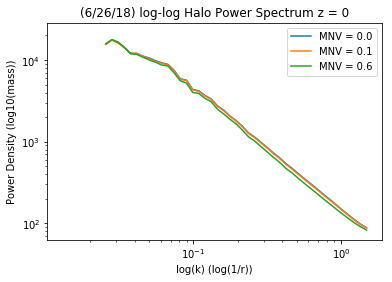

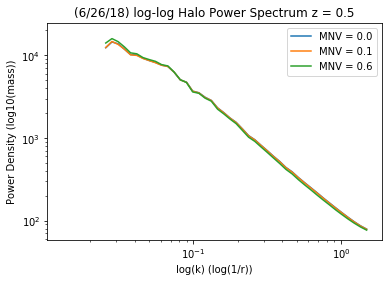

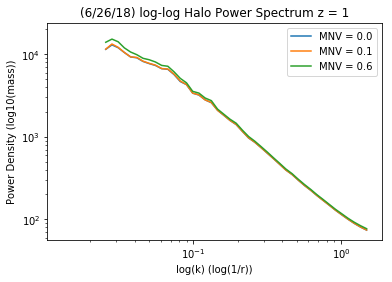

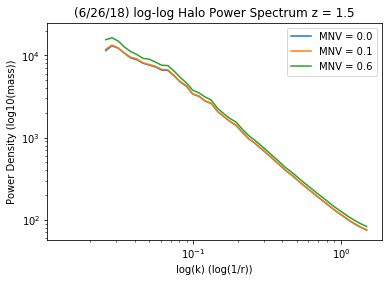

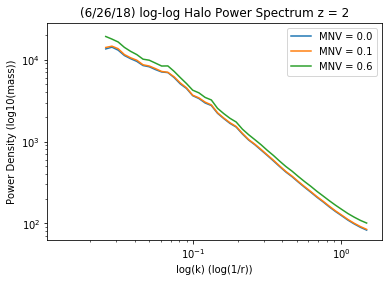

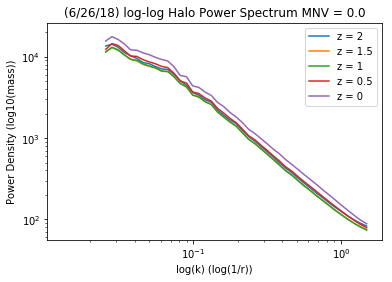

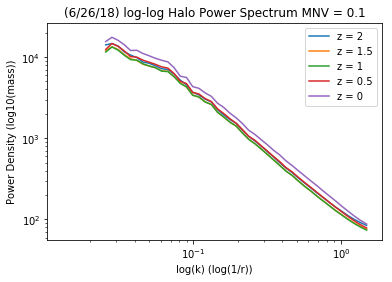

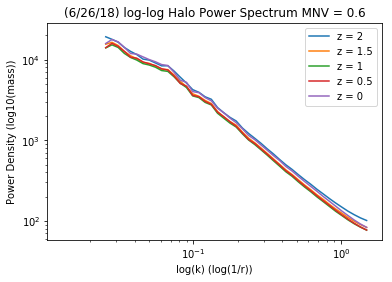

In [13]:

    
plt.title("(6/26/18) log-log Halo Power Spectrum z = 0")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.0/out_66_parents_grid.npy", "MNV = 0.0")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.1/out_66_parents_grid.npy", "MNV = 0.1")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.6/out_66_parents_grid.npy", "MNV = 0.6")
plt.legend()
plt.show()

plt.title("(6/26/18) log-log Halo Power Spectrum z = 0.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.0/out_56_parents_grid.npy", "MNV = 0.0")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.1/out_56_parents_grid.npy", "MNV = 0.1")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.6/out_56_parents_grid.npy", "MNV = 0.6")
plt.legend()
plt.show()

plt.title("(6/26/18) log-log Halo Power Spectrum z = 1")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.0/out_47_parents_grid.npy", "MNV = 0.0")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.1/out_47_parents_grid.npy", "MNV = 0.1")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.6/out_47_parents_grid.npy", "MNV = 0.6")
plt.legend()
plt.show()
    
plt.title("(6/26/18) log-log Halo Power Spectrum z = 1.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.0/out_42_parents_grid.npy", "MNV = 0.0")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.1/out_42_parents_grid.npy", "MNV = 0.1")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.6/out_42_parents_grid.npy", "MNV = 0.6")
plt.legend()
plt.show()    

plt.title("(6/26/18) log-log Halo Power Spectrum z = 2")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.0/out_37_parents_grid.npy", "MNV = 0.0")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.1/out_37_parents_grid.npy", "MNV = 0.1")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.6/out_37_parents_grid.npy", "MNV = 0.6")
plt.legend()
plt.show()
    
    
    

plt.title("(6/26/18) log-log Halo Power Spectrum MNV = 0.0")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.0/out_37_parents_grid.npy", "z = 2")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.0/out_42_parents_grid.npy", "z = 1.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.0/out_47_parents_grid.npy", "z = 1")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.0/out_56_parents_grid.npy", "z = 0.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.0/out_66_parents_grid.npy", "z = 0")
plt.legend()
plt.show()

plt.title("(6/26/18) log-log Halo Power Spectrum MNV = 0.1")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.1/out_37_parents_grid.npy", "z = 2")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.1/out_42_parents_grid.npy", "z = 1.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.1/out_47_parents_grid.npy", "z = 1")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.1/out_56_parents_grid.npy", "z = 0.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.1/out_66_parents_grid.npy", "z = 0")
plt.legend()
plt.show()

plt.title("(6/26/18) log-log Halo Power Spectrum MNV = 0.6")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.6/out_37_parents_grid.npy", "z = 2")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.6/out_42_parents_grid.npy", "z = 1.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.6/out_47_parents_grid.npy", "z = 1")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.6/out_56_parents_grid.npy", "z = 0.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/mnv_0.6/out_66_parents_grid.npy", "z = 0")
plt.legend()
plt.show()


/u/ayannam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


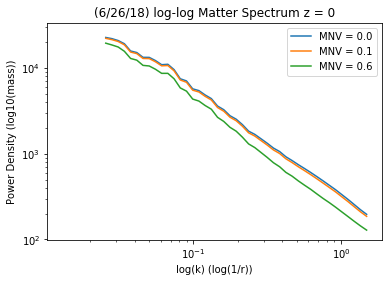

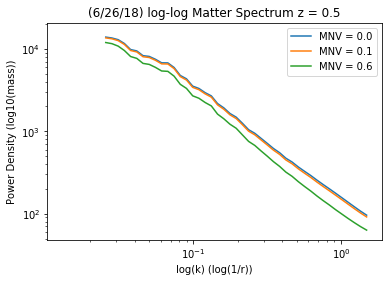

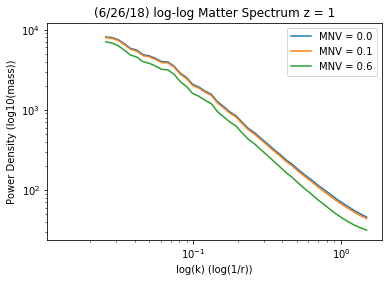

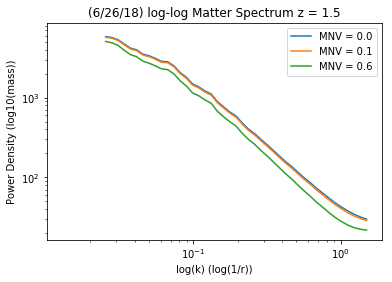

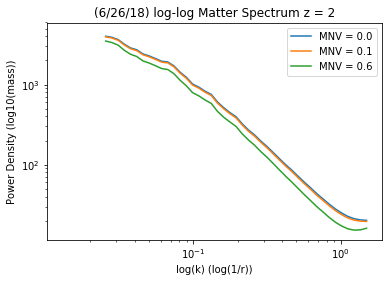

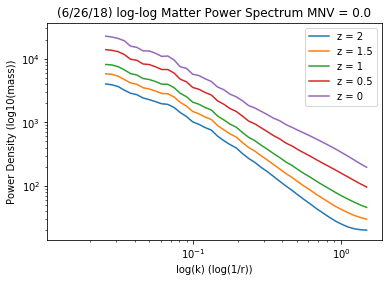

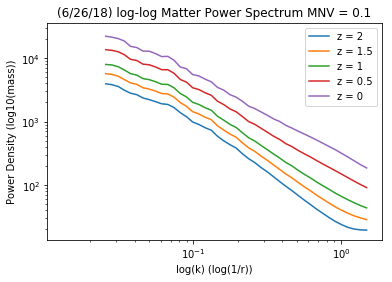

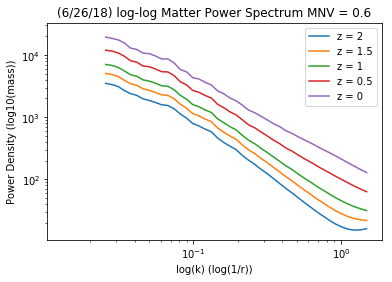

In [47]:
plt.title("(6/26/18) log-log Matter Spectrum z = 0")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.0/snapshot_066.npy", "MNV = 0.0")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.1/snapshot_066.npy", "MNV = 0.1")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.6/snapshot_066.npy", "MNV = 0.6")
plt.legend()
plt.show()

plt.title("(6/26/18) log-log Matter Spectrum z = 0.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.0/snapshot_056.npy", "MNV = 0.0")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.1/snapshot_056.npy", "MNV = 0.1")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.6/snapshot_056.npy", "MNV = 0.6")
plt.legend()
plt.show()

plt.title("(6/26/18) log-log Matter Spectrum z = 1")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.0/snapshot_047.npy", "MNV = 0.0")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.1/snapshot_047.npy", "MNV = 0.1")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.6/snapshot_047.npy", "MNV = 0.6")
plt.legend()
plt.show()
    
plt.title("(6/26/18) log-log Matter Spectrum z = 1.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.0/snapshot_042.npy", "MNV = 0.0")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.1/snapshot_042.npy", "MNV = 0.1")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.6/snapshot_042.npy", "MNV = 0.6")
plt.legend()
plt.show()    

plt.title("(6/26/18) log-log Matter Spectrum z = 2")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.0/snapshot_037.npy", "MNV = 0.0")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.1/snapshot_037.npy", "MNV = 0.1")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.6/snapshot_037.npy", "MNV = 0.6")
plt.legend()
plt.show()
    
    
    

plt.title("(6/26/18) log-log Matter Power Spectrum MNV = 0.0")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.0/snapshot_037.npy", "z = 2")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.0/snapshot_042.npy", "z = 1.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.0/snapshot_047.npy", "z = 1")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.0/snapshot_056.npy", "z = 0.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.0/snapshot_066.npy", "z = 0")
plt.legend()
plt.show()

plt.title("(6/26/18) log-log Matter Power Spectrum MNV = 0.1")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.1/snapshot_037.npy", "z = 2")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.1/snapshot_042.npy", "z = 1.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.1/snapshot_047.npy", "z = 1")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.1/snapshot_056.npy", "z = 0.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.1/snapshot_066.npy", "z = 0")
plt.legend()
plt.show()

plt.title("(6/26/18) log-log Matter Power Spectrum MNV = 0.6")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.6/snapshot_037.npy", "z = 2")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.6/snapshot_042.npy", "z = 1.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.6/snapshot_047.npy", "z = 1")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.6/snapshot_056.npy", "z = 0.5")
plot_power_spectrum("/u/ayannam/Documents/Grids/snapshot_mnv_0.6/snapshot_066.npy", "z = 0")
plt.legend()
plt.show()

/u/ayannam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


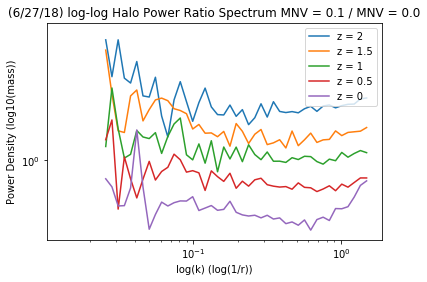

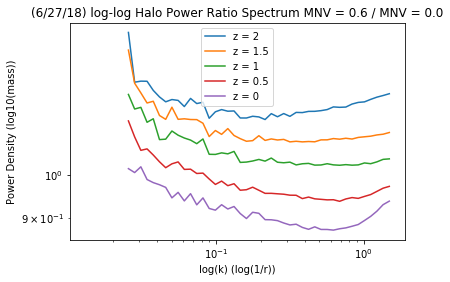

In [12]:

def plot_phh_ratio(grid_filename1, grid_filename2, label):
    
    k1, p1 = process_ps(grid_filename1)
    k2, p2 = process_ps(grid_filename2)

    #plt.plot(k, p)
    #plt.title("(6/25/18) Halo Power Spectrum MNV = 0.1, z = 1")
    #plt.xlabel("k (1/r)")
    #plt.ylabel("Power Density (log10(mass))")
    #plt.show()
    
    plt.plot(k1, p1/p2, label = label)
    #plt.title("(6/25/18) log-log Halo Power Spectrum MNV = 0.1, z = 1")
    plt.xlabel("log(k) (log(1/r))")
    plt.ylabel("Power Density (log10(mass))")
    plt.xscale('log')
    plt.yscale('log')
    

plt.title("(6/27/18) log-log Halo Power Ratio Spectrum MNV = 0.1 / MNV = 0.0")
plot_phh_ratio("/u/ayannam/Documents/Grids/mnv_0.1/out_37_parents_grid.npy", "/u/ayannam/Documents/Grids/mnv_0.0/out_37_parents_grid.npy", "z = 2")
plot_phh_ratio("/u/ayannam/Documents/Grids/mnv_0.1/out_42_parents_grid.npy", "/u/ayannam/Documents/Grids/mnv_0.0/out_42_parents_grid.npy", "z = 1.5")
plot_phh_ratio("/u/ayannam/Documents/Grids/mnv_0.1/out_47_parents_grid.npy", "/u/ayannam/Documents/Grids/mnv_0.0/out_47_parents_grid.npy", "z = 1")
plot_phh_ratio("/u/ayannam/Documents/Grids/mnv_0.1/out_56_parents_grid.npy", "/u/ayannam/Documents/Grids/mnv_0.0/out_56_parents_grid.npy", "z = 0.5")
plot_phh_ratio("/u/ayannam/Documents/Grids/mnv_0.1/out_66_parents_grid.npy", "/u/ayannam/Documents/Grids/mnv_0.0/out_66_parents_grid.npy", "z = 0")
plt.legend()
plt.show()


plt.title("(6/27/18) log-log Halo Power Ratio Spectrum MNV = 0.6 / MNV = 0.0")
plot_phh_ratio("/u/ayannam/Documents/Grids/mnv_0.6/out_37_parents_grid.npy", "/u/ayannam/Documents/Grids/mnv_0.0/out_37_parents_grid.npy", "z = 2")
plot_phh_ratio("/u/ayannam/Documents/Grids/mnv_0.6/out_42_parents_grid.npy", "/u/ayannam/Documents/Grids/mnv_0.0/out_42_parents_grid.npy", "z = 1.5")
plot_phh_ratio("/u/ayannam/Documents/Grids/mnv_0.6/out_47_parents_grid.npy", "/u/ayannam/Documents/Grids/mnv_0.0/out_47_parents_grid.npy", "z = 1")
plot_phh_ratio("/u/ayannam/Documents/Grids/mnv_0.6/out_56_parents_grid.npy", "/u/ayannam/Documents/Grids/mnv_0.0/out_56_parents_grid.npy", "z = 0.5")
plot_phh_ratio("/u/ayannam/Documents/Grids/mnv_0.6/out_66_parents_grid.npy", "/u/ayannam/Documents/Grids/mnv_0.0/out_66_parents_grid.npy", "z = 0")
plt.legend()
plt.show()






/u/ayannam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


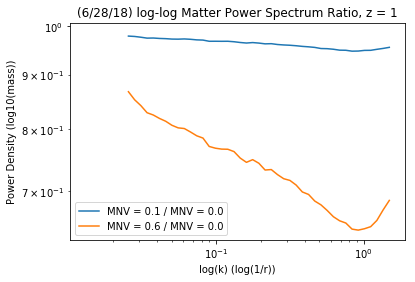

In [30]:
def plot_pmm_ratio(grid_filename1, grid_filename2, label):
    
    k1, p1 = process_ps(grid_filename1)
    k2, p2 = process_ps(grid_filename2)

    #plt.plot(k, p)
    #plt.title("(6/25/18) Halo Power Spectrum MNV = 0.1, z = 1")
    #plt.xlabel("k (1/r)")
    #plt.ylabel("Power Density (log10(mass))")
    #plt.show()
    
    plt.plot(k1, p1/p2, label = label)
    plt.title("(6/28/18) log-log Matter Power Spectrum Ratio, z = 1")
    plt.xlabel("log(k) (log(1/r))")
    plt.ylabel("Power Density (log10(mass))")
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    
plot_pmm_ratio("/u/ayannam/Documents/Grids/snapshot_mnv_0.1/snapshot_047.npy", "/u/ayannam/Documents/Grids/snapshot_mnv_0.0/snapshot_047.npy", "MNV = 0.1 / MNV = 0.0")
plot_pmm_ratio("/u/ayannam/Documents/Grids/snapshot_mnv_0.6/snapshot_047.npy", "/u/ayannam/Documents/Grids/snapshot_mnv_0.0/snapshot_047.npy", "MNV = 0.6 / MNV = 0.0")
plt.show()

/u/ayannam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


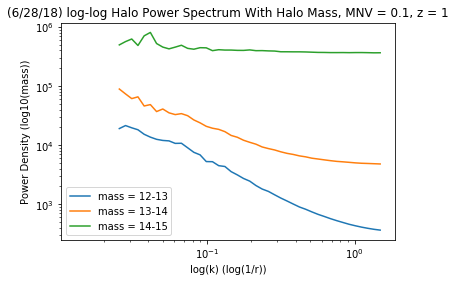

In [42]:
def gridding(halo_positions):
    # returns a 3D grid of the density of halos
    grid = np.histogramdd(halo_positions / Lgrid, bins = [bin_centers, bin_centers, bin_centers])[0]
    grid = grid / np.mean(grid) - 1
    return grid

def process_ps_grid(igrid):
    '''
    Comoput the power spectrum giving the positions of particles/halos.
    Input:
    The positions, output from either read_cat, or read_subsample
    Output: 
    k_normed: the k bin center
    ps3d_normed: the power spectrum
    '''
    k, ps3d = PowerSpectrum3D(igrid)
    k_normed, ps3d_normed = 2*np.pi*k/Lbox, ps3d*(Lgrid/Ngrid)**3
    return k_normed, ps3d_normed

def plot_phh_with_mass_bins(positions_filename, mass_filename, PID_filename):
    
    halo_positions = np.load(positions_filename)
    masses = np.load(mass_filename)
    PID = np.load(PID_filename)
    
    parents_mask = PID == -1
    
    mass_g12_mask = masses >= 12
    mass_l13_mask = masses < 13
    mass_12_13_mask = mass_g12_mask & mass_l13_mask
    mass_12_13_mask = mass_12_13_mask & parents_mask
    
    mass_g13_mask = masses >= 13
    mass_l14_mask = masses < 14
    mass_13_14_mask = mass_g13_mask & mass_l14_mask
    mass_13_14_mask = mass_13_14_mask & parents_mask
    
    mass_g14_mask = masses >= 14
    mass_l15_mask = masses < 15
    mass_14_15_mask = mass_g14_mask & mass_l15_mask
    mass_14_15_mask = mass_14_15_mask & parents_mask
    
    grid_12_13 = gridding(halo_positions[mass_12_13_mask])
    grid_13_14 = gridding(halo_positions[mass_13_14_mask])
    grid_14_15 = gridding(halo_positions[mass_14_15_mask])
    
    k12, p12 = process_ps_grid(grid_12_13)
    k13, p13 = process_ps_grid(grid_13_14)
    k14, p14 = process_ps_grid(grid_14_15)
    
    plt.plot(k12, p12, label = "mass = 12-13")
    plt.plot(k13, p13, label = "mass = 13-14")
    plt.plot(k14, p14, label = "mass = 14-15")
    
    plt.title("(6/28/18) log-log Halo Power Spectrum With Halo Mass, MNV = 0.1, z = 1")
    plt.xlabel("log(k) (log(1/r))")
    plt.ylabel("Power Density (log10(mass))")
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    
plot_phh_with_mass_bins("/u/ayannam/Documents/Raw_Data/mnv_0.1/out_47_parents_pos.npy", 
                        "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_47_parents_mass.npy", 
                        "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_47_parents_PID.npy")




/u/ayannam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


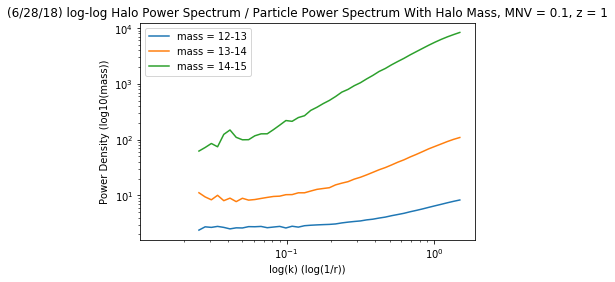

In [46]:
def plot_phhpmm_with_mass_bins(positions_filename, mass_filename, PID_filename, particle_grid_filename):
    
    halo_positions = np.load(positions_filename)
    masses = np.load(mass_filename)
    PID = np.load(PID_filename)
    
    parents_mask = PID == -1
    
    mass_g12_mask = masses >= 12
    mass_l13_mask = masses < 13
    mass_12_13_mask = mass_g12_mask & mass_l13_mask
    mass_12_13_mask = mass_12_13_mask & parents_mask
    
    mass_g13_mask = masses >= 13
    mass_l14_mask = masses < 14
    mass_13_14_mask = mass_g13_mask & mass_l14_mask
    mass_13_14_mask = mass_13_14_mask & parents_mask
    
    mass_g14_mask = masses >= 14
    mass_l15_mask = masses < 15
    mass_14_15_mask = mass_g14_mask & mass_l15_mask
    mass_14_15_mask = mass_14_15_mask & parents_mask
    
    grid_12_13 = gridding(halo_positions[mass_12_13_mask])
    grid_13_14 = gridding(halo_positions[mass_13_14_mask])
    grid_14_15 = gridding(halo_positions[mass_14_15_mask])
    
    k12, p12 = process_ps_grid(grid_12_13)
    k13, p13 = process_ps_grid(grid_13_14)
    k14, p14 = process_ps_grid(grid_14_15)
    
    k1, p1 = process_ps(particle_grid_filename)
    
    plt.plot(k12, p12 / p1, label = "mass = 12-13")
    plt.plot(k13, p13 / p1, label = "mass = 13-14")
    plt.plot(k14, p14 / p1, label = "mass = 14-15")
    
    plt.title("(6/28/18) log-log Halo Power Spectrum / Particle Power Spectrum With Halo Mass, MNV = 0.1, z = 1")
    plt.xlabel("log(k) (log(1/r))")
    plt.ylabel("Power Density (log10(mass))")
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()

plot_phhpmm_with_mass_bins("/u/ayannam/Documents/Raw_Data/mnv_0.1/out_47_parents_pos.npy", 
                        "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_47_parents_mass.npy", 
                        "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_47_parents_PID.npy",
                        "/u/ayannam/Documents/Grids/snapshot_mnv_0.1/snapshot_047.npy"
                       )


...Processing ASCII data of file: 
/u/ayannam/Documents/Test_Files/out_47_parents.list
 
Total number of rows in detected data = 3472419
Number of rows in detected header = 16 

... working on chunk 0 of 2
... working on chunk 1 of 2
Total runtime to read in ASCII = 22.86 seconds




/u/ayannam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


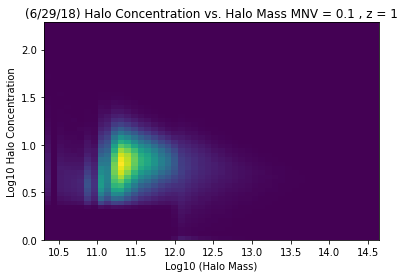

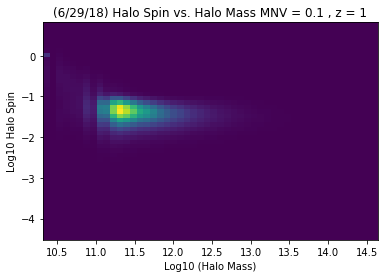

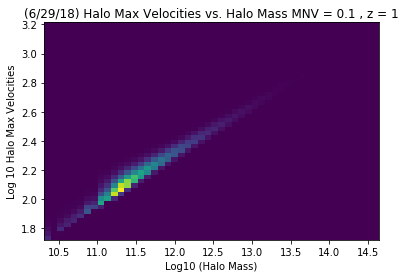

In [16]:
def read_cat(cat_filename):
    # returns a matrix with each halo as the row and x, y, z positions as the columns, array of the log10 of the halo masses, and the PID array
    # must use 3D accessing to access postions and 2D accessing to access the masses where the second dimension is the halo
    reader = sim_manager.TabularAsciiReader(cat_filename, columns_dict)
    halo_arr = reader.read_ascii() # array of tuples containing values for each item in columns_dict
    halo_pos_arr = np.array([halo_arr["halo_x"], halo_arr["halo_y"], halo_arr["halo_z"]]).T #array of arrays containing the x, y, z positions of the halo
    halo_mass_arr = np.log10(halo_arr["halo_mvir"]) # array of log base 10 of the halo masses
    halo_c_arr = np.log10(np.array(halo_arr["halo_rvir"]) / np.array(halo_arr["halo_rs"])) # array of halo concentrations
    halo_spin_arr = np.array(halo_arr["halo_spin"])
    halo_spin_arr = np.where(halo_spin_arr != 0, np.log10(halo_spin_arr), 0)
    halo_vmax_arr = np.log10(halo_arr["halo_vmax"])
    halo_PID_arr = np.array(halo_arr["PID"])
    
    return halo_pos_arr, halo_mass_arr, halo_c_arr, halo_spin_arr, halo_vmax_arr, halo_PID_arr

def plot_assembly(cat_filename):

    mass_arr, halo_c_arr, halo_spin_arr, halo_vmax_arr, PID_arr = read_cat(cat_filename)[1:] # mass and PID of all the halos

    parents_mask = PID_arr == -1 # boolean array with True for parent halos and False for subhalos
    subhalo_mask = PID_arr != -1 # boolean array with True for subhalos and False for parent halos
    
    mass_parents = mass_arr[parents_mask]
    c_parents = halo_c_arr[parents_mask]
    spin_parents = halo_spin_arr[parents_mask]
    vmax_parents = halo_vmax_arr[parents_mask]
    
    plt.hist2d(mass_parents, c_parents, bins = (50, 50))
    #plt.plot(mass_arr[subhalo_mask], halo_c_arr[subhalo_mask], label = "Sub Halos")

    plt.title("(6/29/18) Halo Concentration vs. Halo Mass MNV = 0.1 , z = 1")
    plt.xlabel("Log10 (Halo Mass)")
    plt.ylabel("Log10 Halo Concentration")
    plt.show()
    
    plt.hist2d(mass_parents, spin_parents, bins = (50, 50))
    #plt.plot(mass_arr[subhalo_mask], halo_c_arr[subhalo_mask], label = "Sub Halos")

    plt.title("(6/29/18) Halo Spin vs. Halo Mass MNV = 0.1 , z = 1")
    plt.xlabel("Log10 (Halo Mass)")
    plt.ylabel("Log10 Halo Spin")
    plt.show()
    
    plt.hist2d(mass_parents, vmax_parents, bins = (50, 50))
    #plt.plot(mass_arr[subhalo_mask], halo_c_arr[subhalo_mask], label = "Sub Halos")

    plt.title("(6/29/18) Halo Max Velocities vs. Halo Mass MNV = 0.1 , z = 1")
    plt.xlabel("Log10 (Halo Mass)")
    plt.ylabel("Log 10 Halo Max Velocities")
    plt.show()

    

plot_assembly("/u/ayannam/Documents/Test_Files/out_47_parents.list")

In [10]:
def plot_assembly(mass_fn, con_fn, spin_fn, vmax_fn, PID_fn, mnv, z):
    
    mass_arr = np.load(mass_fn) 
    halo_c_arr = np.load(con_fn)
    halo_spin_arr = np.load(spin_fn)
    halo_vmax_arr = np.load(vmax_fn) 
    PID_arr = np.load(PID_fn)

    parents_mask = PID_arr == -1 # boolean array with True for parent halos and False for subhalos
    subhalo_mask = PID_arr != -1 # boolean array with True for subhalos and False for parent halos
    
    mass_parents = mass_arr[parents_mask]
    c_parents = halo_c_arr[parents_mask]
    spin_parents = halo_spin_arr[parents_mask]
    vmax_parents = halo_vmax_arr[parents_mask]
    
    plt.hist2d(mass_parents, c_parents, bins = (50, 50))
    #plt.plot(mass_arr[subhalo_mask], halo_c_arr[subhalo_mask], label = "Sub Halos")

    plt.title("(6/29/18) Halo Concentration vs. Halo Mass MNV = " + str(mnv) + " z = " + str(z))
    plt.xlabel("Log10 (Halo Mass)")
    plt.ylabel("Log10 Halo Concentration")
    plt.show()
    
    plt.hist2d(mass_parents, spin_parents, bins = (50, 50))
    #plt.plot(mass_arr[subhalo_mask], halo_c_arr[subhalo_mask], label = "Sub Halos")

    plt.title("(6/29/18) Halo Spin vs. Halo Mass MNV = " + str(mnv) + " z = " + str(z))
    plt.xlabel("Log10 (Halo Mass)")
    plt.ylabel("Log10 Halo Spin")
    plt.show()
    
    plt.hist2d(mass_parents, vmax_parents, bins = (50, 50))
    #plt.plot(mass_arr[subhalo_mask], halo_c_arr[subhalo_mask], label = "Sub Halos")

    plt.title("(6/29/18) Halo Max Velocities vs. Halo Mass MNV = " + str(mnv) + " z = " + str(z))
    plt.xlabel("Log10 (Halo Mass)")
    plt.ylabel("Log 10 Halo Max Velocities")
    plt.show()
    


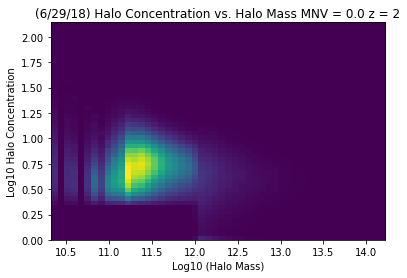

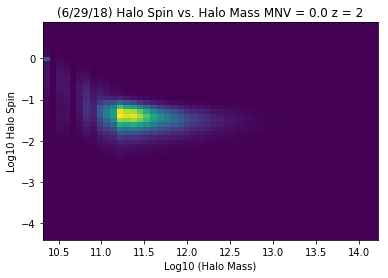

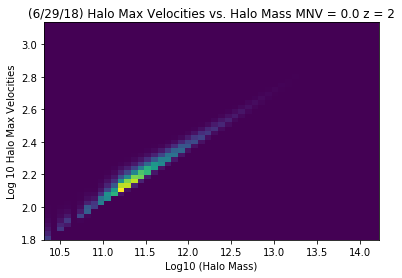

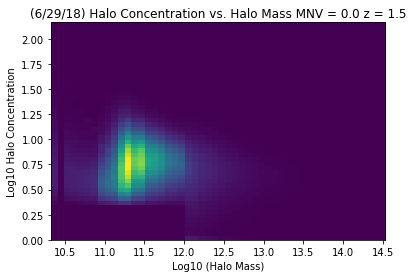

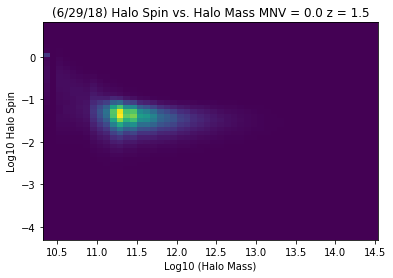

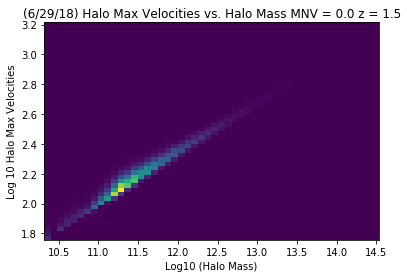

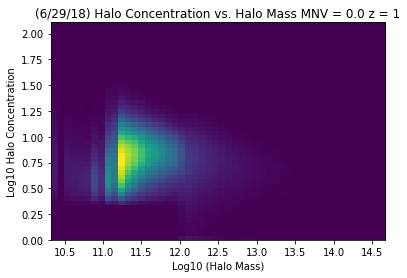

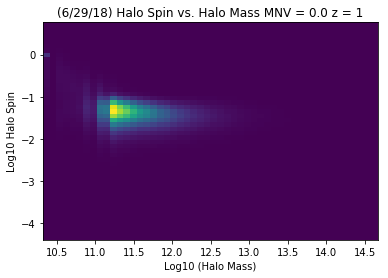

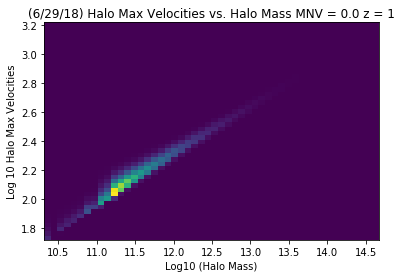

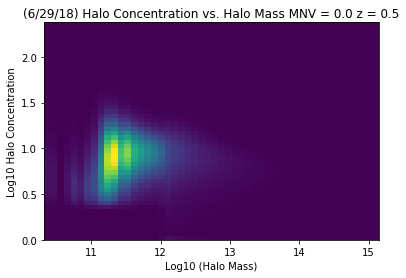

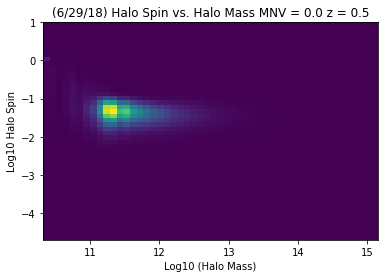

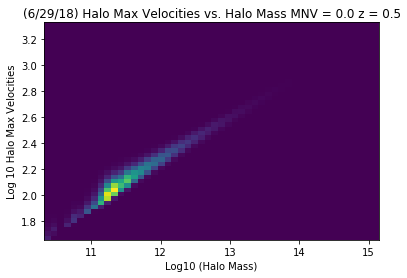

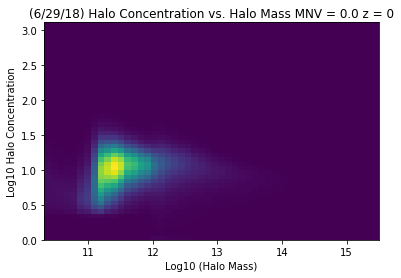

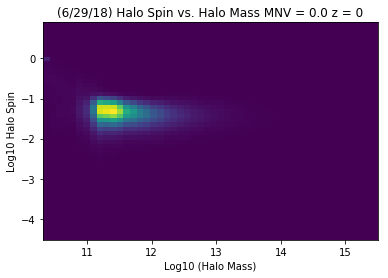

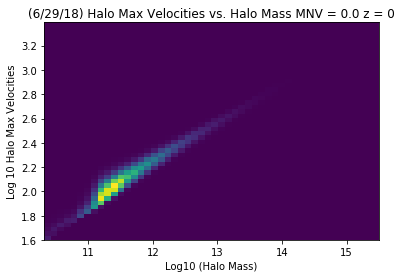

In [11]:
plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.0/out_37_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_37_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_37_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_37_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_37_parents_PID.npy", 0.0, 2)

plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.0/out_42_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_42_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_42_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_42_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_42_parents_PID.npy", 0.0, 1.5)

plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.0/out_47_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_47_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_47_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_47_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_47_parents_PID.npy", 0.0, 1)

plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.0/out_56_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_56_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_56_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_56_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_56_parents_PID.npy", 0.0, 0.5)

plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.0/out_66_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_66_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_66_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_66_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.0/out_66_parents_PID.npy", 0.0, 0)

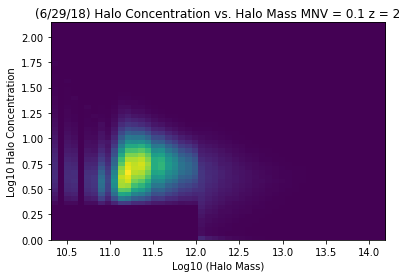

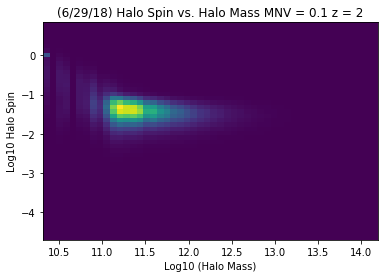

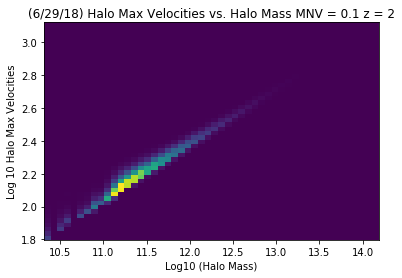

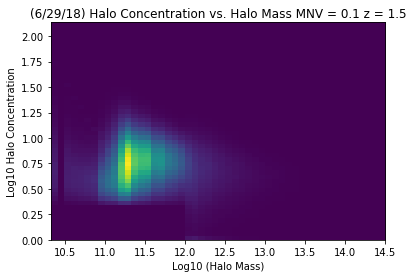

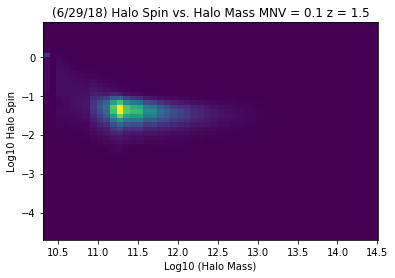

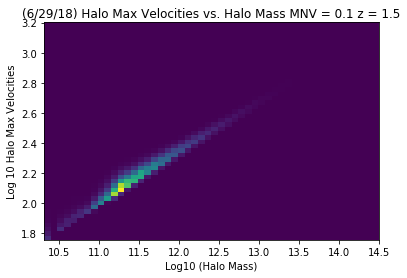

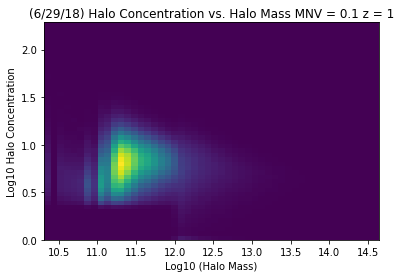

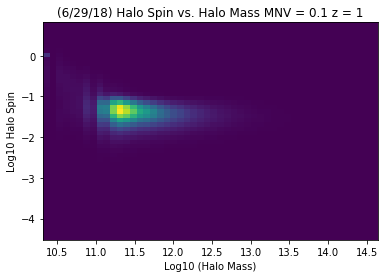

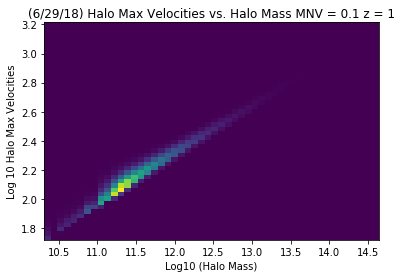

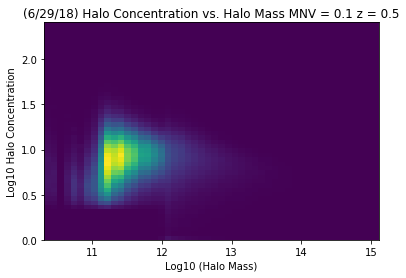

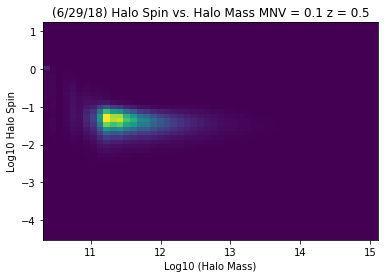

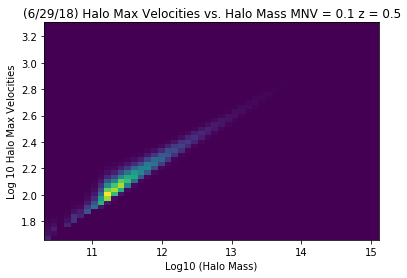

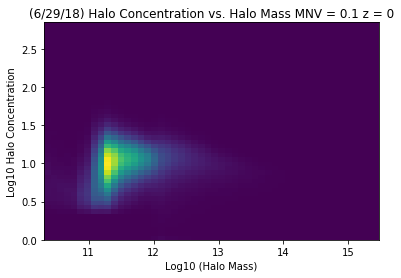

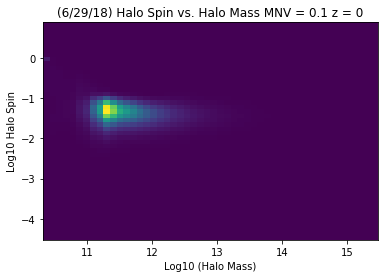

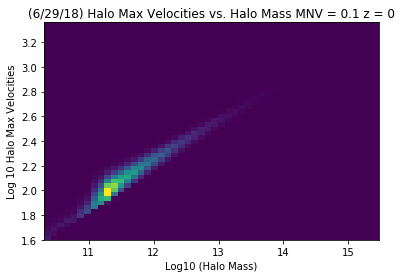

In [12]:
plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.1/out_37_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_37_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_37_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_37_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_37_parents_PID.npy", 0.1, 2)

plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.1/out_42_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_42_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_42_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_42_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_42_parents_PID.npy", 0.1, 1.5)

plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.1/out_47_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_47_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_47_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_47_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_47_parents_PID.npy", 0.1, 1)

plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.1/out_56_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_56_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_56_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_56_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_56_parents_PID.npy", 0.1, 0.5)

plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.1/out_66_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_66_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_66_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_66_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.1/out_66_parents_PID.npy", 0.1, 0)

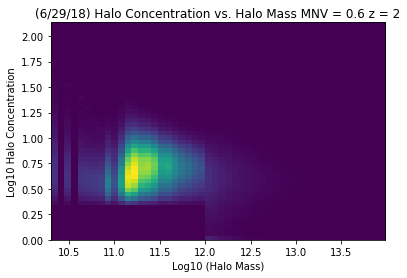

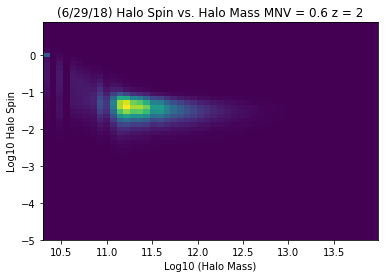

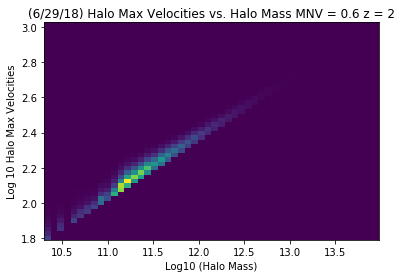

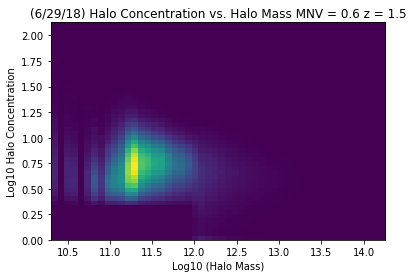

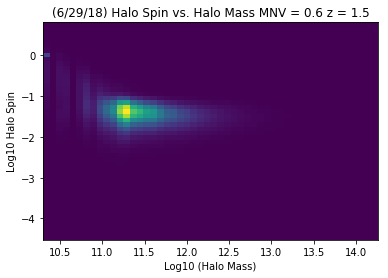

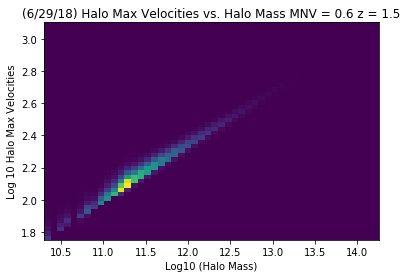

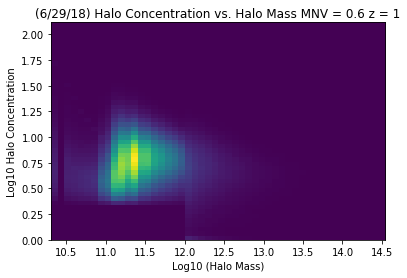

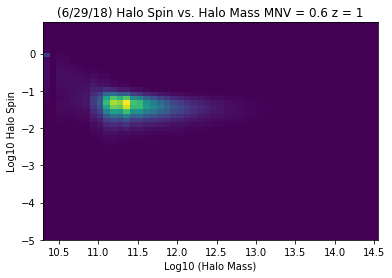

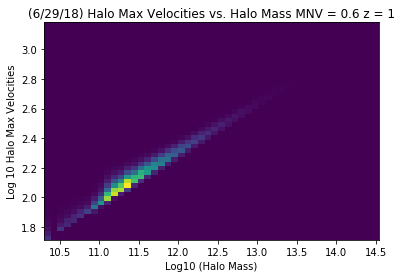

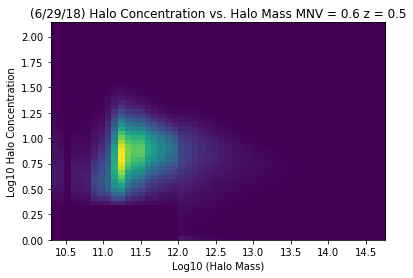

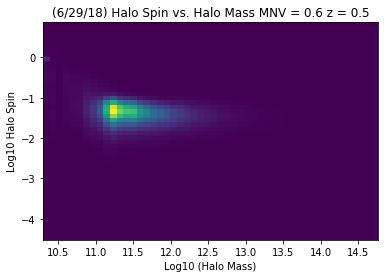

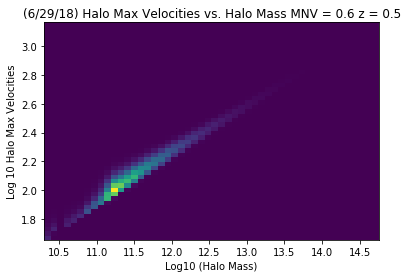

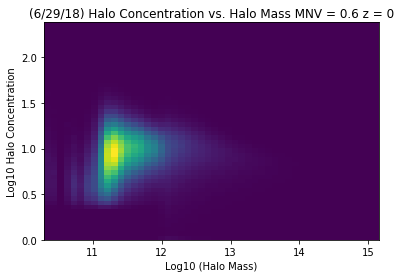

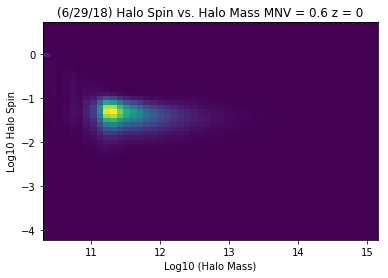

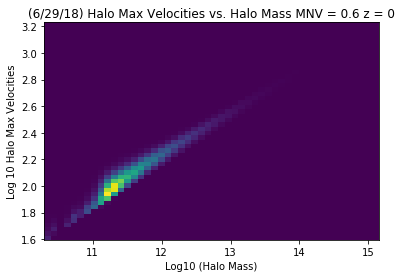

In [13]:
plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.6/out_37_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_37_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_37_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_37_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_37_parents_PID.npy", 0.6, 2)

plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.6/out_42_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_42_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_42_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_42_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_42_parents_PID.npy", 0.6, 1.5)

plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.6/out_47_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_47_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_47_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_47_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_47_parents_PID.npy", 0.6, 1)

plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.6/out_56_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_56_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_56_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_56_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_56_parents_PID.npy", 0.6, 0.5)

plot_assembly("/u/ayannam/Documents/Raw_Data/mnv_0.6/out_66_parents_mass.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_66_parents_con.npy", \
              "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_66_parents_spin.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_66_parents_vmax.npy", \
             "/u/ayannam/Documents/Raw_Data/mnv_0.6/out_66_parents_PID.npy", 0.6, 0)